In [1]:
library(googlesheets4)
library(ggplot2)
library(ggbeeswarm)
library(glue)

Warning message:
"package 'ggbeeswarm' was built under R version 4.0.5"


In [2]:
ctrl_df <- read.csv("Z:/DeepLearningData/research_010_NIH3T3/shCtrl_003/data/segmented_cj_quantification_result/cj_005_merge_data_.csv")

ctrl_data <- ctrl_df$cj_length * 5

ctrl_df_ <- data.frame(ctrl_data)
ctrl_df_["type"] = "ctrl"
colnames(ctrl_df_) <- c("length","type")

In [3]:
kd_df <- read.csv("Z:/DeepLearningData/research_010_NIH3T3/shOPA1_003//data/segmented_cj_quantification_result/cj_005_merge_data_.csv")
kd_data <- kd_df$cj_length * 5

kd_df_ <- data.frame(kd_data)
kd_df_["type"] = "kd"
colnames(kd_df_) <- c("length","type")


In [4]:
all_data <- rbind(ctrl_df_, kd_df_)

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_tex

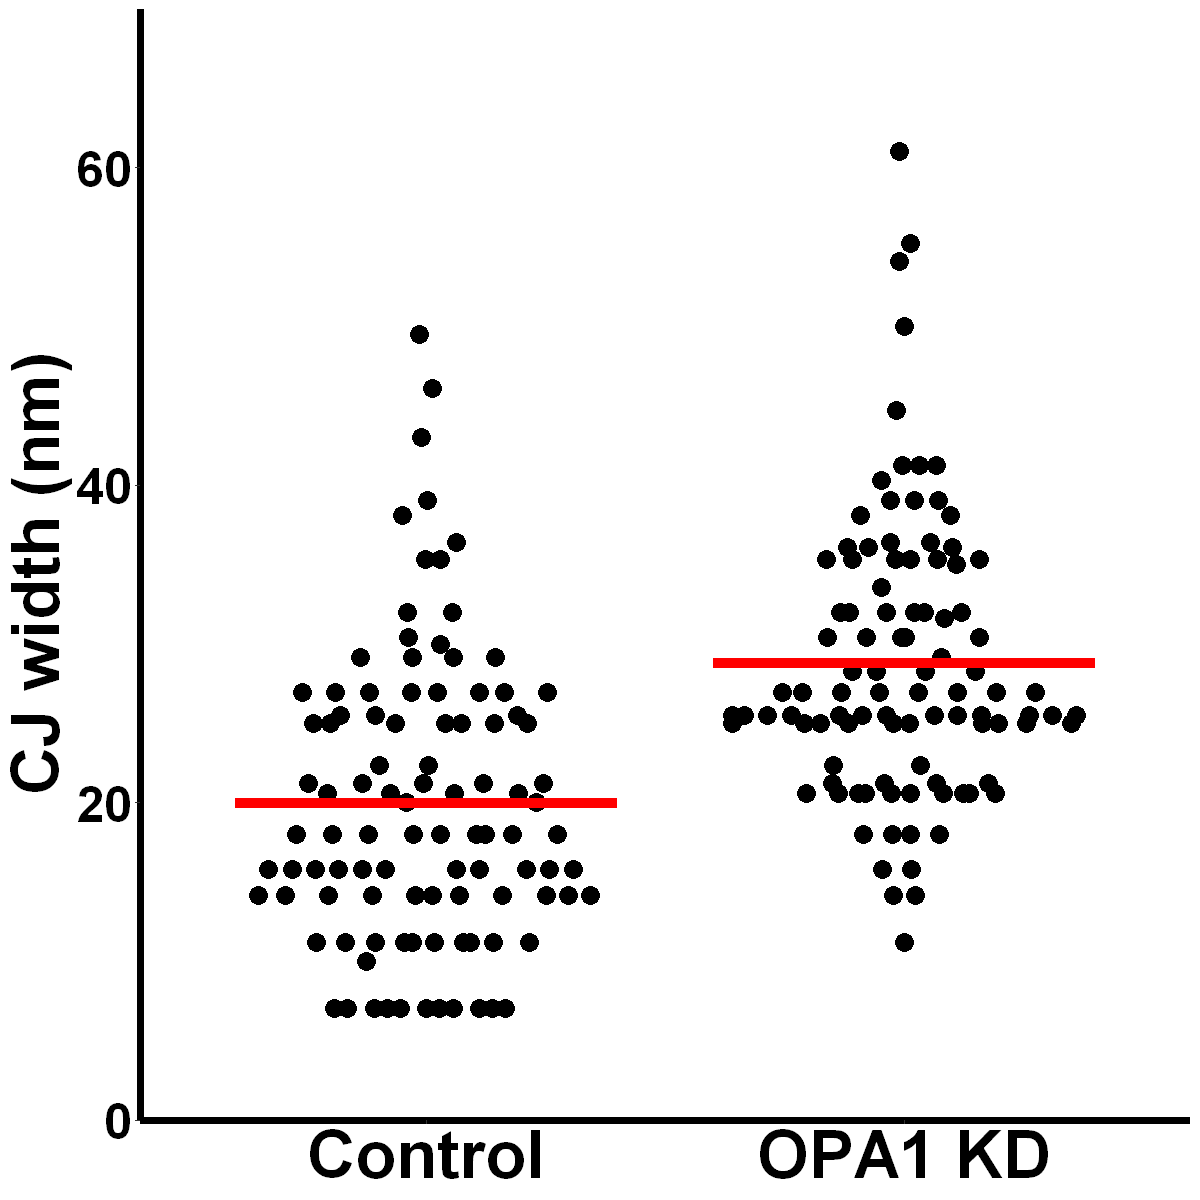

In [5]:
options(repr.plot.width=10, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(0, 70)
)

graph <- graph + labs(
    y = "CJ width (nm) "
) + geom_quasirandom(
    data = all_data,
    aes(type, length),
    size =5 ,
    position=position_jitter(width = 0.3, height = 0)
) 


graph <- graph + annotate(
    "segment",
    x = 0.6, xend = 1.4,
    y = mean(all_data[all_data$type == "ctrl", ]$length), 
    yend = mean(all_data[all_data$type == "ctrl", ]$length),
    size = 3,
    color="red"
)+ annotate(
    "segment",
    x = 1.6, xend = 2.4,
    y = mean(all_data[all_data$type == "kd", ]$length), 
    yend = mean(all_data[all_data$type == "kd", ]$length),
    size = 3,
    color="red"
)  + scale_x_discrete(
    labels = c("Control", "OPA1 KD"),
)

graph

In [6]:
wilcox.test(
    all_data[all_data$type == "ctrl", ]$`length`, 
    all_data[all_data$type == "kd", ]$`length`
)


	Wilcoxon rank sum test with continuity correction

data:  all_data[all_data$type == "ctrl", ]$length and all_data[all_data$type == "kd", ]$length
W = 2322.5, p-value = 5.671e-11
alternative hypothesis: true location shift is not equal to 0
